In [8]:
import sys
import os.path
import requests
import json
from datetime import datetime 
import pandas as pd

In [9]:
cfm_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
rec_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

cfm_df.drop(columns=['Lat', 'Long'], inplace=True)
cfm_df = cfm_df.groupby('Country/Region').sum().transpose()
death_df.drop(columns=['Lat', 'Long'], inplace=True)
death_df = death_df.groupby('Country/Region').sum().transpose()
rec_df.drop(columns=['Lat', 'Long'], inplace=True)
rec_df = rec_df.groupby('Country/Region').sum().transpose()

world_total = {}
for item in cfm_df.index:
    #print(f'index: {index}, item: {item}')
    #world_total = cfm_df.loc[index, item].sum()
    #cfm_todate = cfm_df.loc[item].sum()
    #death_todate = death_df.loc[item].sum()
    #rec_todate = rec_df.loc[item].sum()
    cfm_df.loc[item, 'World Confirmed'] = cfm_df.loc[item].sum()
    death_df.loc[item, 'World Death'] = death_df.loc[item].sum()
    rec_df.loc[item, 'World Recovered'] = rec_df.loc[item].sum()
#cfm_todate, death_todate, rec_todate




In [10]:
rec_df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,World Recovered
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39.0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/3/20,25669,3031,21901,821,476,75,91302,29861,10623,19063,...,1023,16838,11622,374,5390,8,863,4701,1057,10913000.0
8/4/20,25669,3031,22375,825,503,75,94129,30372,10799,19336,...,1048,18051,11875,378,6419,8,863,5109,1238,11134735.0
8/5/20,25742,3123,22802,825,506,76,96948,30850,10941,19464,...,1065,18783,12146,381,6618,8,894,5667,1238,11356275.0
8/6/20,25840,3155,23238,828,520,76,99852,31556,11119,19596,...,1079,19291,12470,392,6907,8,898,5786,1264,11545401.0


In [16]:
cfm_df['Malaysia']

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       3
1/26/20       4
           ... 
8/3/20     9001
8/4/20     9002
8/5/20     9023
8/6/20     9038
8/7/20     9063
Name: Malaysia, Length: 199, dtype: int64

In [12]:
# create dataframe by country
my_df = pd.DataFrame([cfm_df['Malaysia'], death_df['Malaysia'], rec_df['Malaysia']])
my_df = my_df.transpose()
my_df.columns = ['Total Cases', 'Total Deaths', 'Total Recovered']

In [13]:
# TODO: make this into methods ... active, daily cases, daily deaths, daily recovered, cases 1m pop, rates %
my_df['Total Active'] = my_df['Total Cases'] - my_df['Total Recovered'] - my_df['Total Deaths']

<AxesSubplot:>

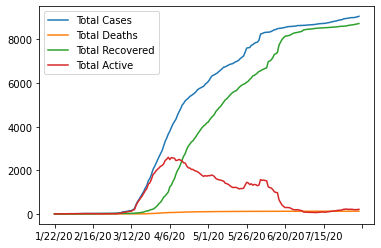

In [17]:
my_df.plot()